## 데이터 불러오기

In [1]:
import os
from os.path import join

import pandas as pd
import numpy as np

In [2]:
data_dir = os.getenv('HOME')+'/1.AIFFEL_Study/Hackathon/1.210209_10/1.data'

train_data_path = join(data_dir, 'sales_train.csv')
test_data_path = join(data_dir, 'test.csv')
sample_submission_data_path = join(data_dir,'sample_submission.csv')
item_categories_data_path = join(data_dir, 'item_categories.csv')
items_data_path = join(data_dir, 'items.csv')
shops_data_path = join(data_dir, 'shops.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
sample_submission = pd.read_csv(sample_submission_data_path)
item_categories = pd.read_csv(item_categories_data_path)
items = pd.read_csv(items_data_path)
shops = pd.read_csv(shops_data_path)


print('train data dim : {}'.format(train.shape)) # 훈련 데이터 형태
print('test data dim : {}'.format(test.shape))    # 시험 데이터 형태
print('submission dim : {}'.format(sample_submission.shape)) # 제출 샘플 데이터 형태
print('item_categories data dim : {}'.format(item_categories.shape)) # 아이템 카데고리 데이터 형태
print('items data dim : {}'.format(items.shape)) # 아이템 데이터 형태
print('shops data dim : {}'.format(shops.shape)) # 상점 데이터 형태

train data dim : (2935849, 6)
test data dim : (214200, 3)
submission dim : (214200, 2)
item_categories data dim : (84, 2)
items data dim : (22170, 3)
shops data dim : (60, 2)


In [3]:
print(train.columns)
print(test.columns)
print(sample_submission.columns)
print(item_categories.columns)
print(items.columns)
print(shops.columns)

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')
Index(['ID', 'shop_id', 'item_id'], dtype='object')
Index(['ID', 'item_cnt_month'], dtype='object')
Index(['item_category_name', 'item_category_id'], dtype='object')
Index(['item_name', 'item_id', 'item_category_id'], dtype='object')
Index(['shop_name', 'shop_id'], dtype='object')


# 데이터 타입 확인

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [5]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [7]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


***

# 데이터 프레임 확인

In [8]:
train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [9]:
test.head(10)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [10]:
item_categories.head(10)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [11]:
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [12]:
shops.head(10)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [13]:
sample_submission.head(5)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


***

## 결측치 탐색

In [14]:
# 결측치 없음
for c in train.columns:
    print('{} : {}'.format(c, len(train.loc[pd.isnull(train[c]), c].values)))    
print('------------------------------------------------------------------')
for c in test.columns:
    print('{} : {}'.format(c, len(test.loc[pd.isnull(test[c]), c].values)))
print('------------------------------------------------------------------')
for c in item_categories.columns:
    print('{} : {}'.format(c, len(item_categories.loc[pd.isnull(item_categories[c]), c].values)))
print('------------------------------------------------------------------')
for c in items.columns:
    print('{} : {}'.format(c, len(items.loc[pd.isnull(items[c]), c].values)))
print('------------------------------------------------------------------')
for c in shops.columns:
    print('{} : {}'.format(c, len(shops.loc[pd.isnull(shops[c]), c].values)))

date : 0
date_block_num : 0
shop_id : 0
item_id : 0
item_price : 0
item_cnt_day : 0
------------------------------------------------------------------
ID : 0
shop_id : 0
item_id : 0
------------------------------------------------------------------
item_category_name : 0
item_category_id : 0
------------------------------------------------------------------
item_name : 0
item_id : 0
item_category_id : 0
------------------------------------------------------------------
shop_name : 0
shop_id : 0


***

# 이상치 탐색

## 1) train

### date 살펴보기
- 최소 최대로 알아보기 (범위: 2013년 01월 01일부터 2015년 10월 31일까지)

In [15]:
date_list = []
for i in range(train.shape[0]):
    date_list.append('')
    for j in train['date'][i].split('.')[::-1]:
        date_list[i] += j
    if date_list[-1] == '':
        date_list.remove('')
for i in date_list:
    if int(i) < 20130101 or int(i) > 20151031:
        print('date열에서 이상치 row번호: ', i)
print('date열 문제 없음')        

date열 문제 없음


In [16]:
date_list[:3]

['20130102', '20130103', '20130105']

### date_block_num 살펴보기
- 0 ~ 33 범위내에 있어야 함

In [17]:
for i in train['date_block_num']:
    if i < 0 or i > 33:
        print('범위에서 벗어나는 row 번호: ', i)
print('date_block_num열 문제 없음')        

date_block_num열 문제 없음


### shop_id 살펴보기

In [18]:
# train의 shop_id
train_shop_id = np.sort(train['shop_id'].unique())
print(train_shop_id)
print(len(train_shop_id))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
60


In [19]:
# shops의 shop_id
shops_shop_id = np.sort(shops['shop_id'].unique())
print(shops_shop_id)
print(len(shops_shop_id))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
60


In [20]:
train_shop_id == shops_shop_id

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

### item_id 살펴보기

In [21]:
# train의 item_id
train_item_id = np.sort(train['item_id'].unique())
print(train_item_id)
print(len(train_item_id))

[    0     1     2 ... 22167 22168 22169]
21807


In [ ]:
첫 번째 방법
item_id == 'A' --> 어떤 category_id --> 평균 --> test의 'A`'판매량
새로운 train 데이터 프레임 생성
학습
예측

두 번째 방법
train의 item_id == 'A'
학습
test의 item_id가 'A'를 예측할 수 있다.
>> item_id == 'A' --> 어떤 category_id --> 평균 --> test의 'A`'판매량

In [22]:
# items의 item_id
items_item_id = np.sort(items['item_id'].unique())
print(items_item_id)
print(len(items_item_id))

[    0     1     2 ... 22167 22168 22169]
22170


In [59]:
test_item_id = np.sort(items['item_id'].unique())
print(test_item_id)
print(len(test_item_id))

[    0     1     2 ... 22167 22168 22169]
22170


### item_price 살펴보기

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

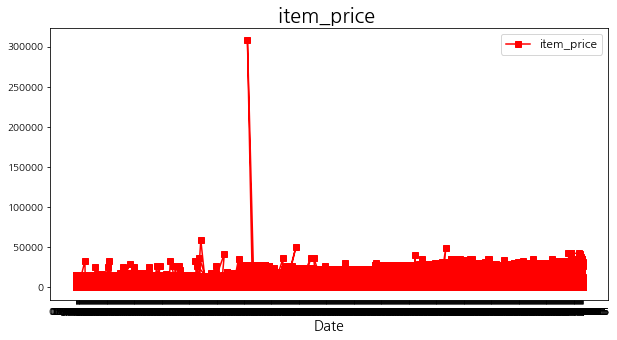

In [24]:
plt.rcParams["figure.figsize"] = (10,5)

plt.plot(train.date, train.item_price, marker='s', color='r')
# plt.plot(train.date, train.item_cnt_day, marker='o', color='g')
# plt.plot(train.date, train.Low, marker='*', color='b')
# plt.plot(train.date, train.Open, marker='+', color='y')

plt.title('item_price ', fontsize=20) 
# plt.ylabel('Stock', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['item_price'], fontsize=12, loc='best')

plt.show()

In [25]:
# item_price가 너무 이상하게 큰 값 찾기
train[train['item_price']>250000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [26]:
train['item_price'].max()

307980.0

In [27]:
train[train['item_id'] == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [28]:
items[items['item_id'] == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


In [29]:
item_categories[item_categories['item_category_id'] == 75]

,item_category_name,item_category_id
75,Программы - Для дома и офиса,75


### 그래프를 보면 가격이 50,000이하로 분포되어 있다.
### 아마 0이 추가로 입력된 것으로 판단.
### 307980.0 ->  30798.0으로 수정

In [30]:
train[train['item_id'] == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [31]:
# # 이상치 수정
# train.loc[train.item_id == 6066, 'item_price'] = train.loc[1163158]['item_price'] / 10
# train.iloc[1163158:1163159, :]

### item_cnt_day 살펴보기
- 일일 판매량은 자연수!

In [32]:
# 일일 판매량 오류 살펴보기
item_cnt_day_error = []
for i in range(train.shape[0]):
    if train['item_cnt_day'][i] < 0: 
        item_cnt_day_error.append(i)
print(len(item_cnt_day_error)) # 7356

7356


In [33]:
# 조건을 통해 일일 판매량 오류 데이터 살펴보기
train[train['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [34]:
# 2번 데이터 앞뒤 데이터 함께 보기
# 1번과 'shop_id', 'item_id' 같지만 (당연하지만 'item_price' 같다) 'item_cnt_day'는 -1이다.
# >> -1을 1로 변경해야 한다!
train.iloc[1:4,:]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0


**item_cnt_day의 열 수정: 음수 --> 양수**

In [35]:
# train.loc[train.item_cnt_day < 0, 'item_cnt_day'] = train.loc[item_cnt_day_error,:]['item_cnt_day'] * -1
# train.iloc[1:4,:] # 2번 데이터 수정 확인

In [36]:
# # 전체 데이테에 대해 다시 검사
# item_cnt_day_error = []
# for i in range(train.shape[0]):
#     if train['item_cnt_day'][i] < 0: 
#         item_cnt_day_error.append(i)
# print(len(item_cnt_day_error)) # 없음

<AxesSubplot:xlabel='date', ylabel='item_cnt_day'>

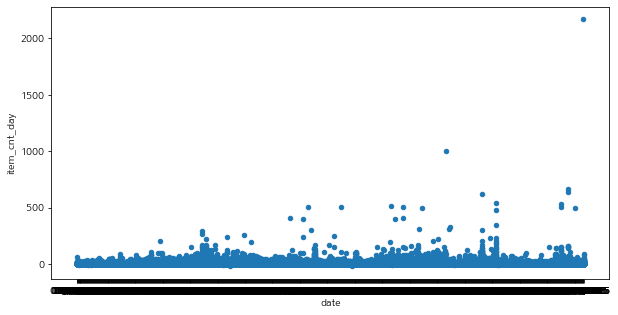

In [37]:
train.plot(kind='scatter', x='date', y='item_cnt_day')

In [38]:
train[train['item_cnt_day']>2000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [58]:
train[train['item_id'] == 11373]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,price_per_day
58323,08.01.2013,0,12,11373,1000.00,1.0,1000.0
58324,31.01.2013,0,12,11373,97.80,5.0,489.0
176790,01.02.2013,1,12,11373,229.00,1.0,229.0
176791,04.02.2013,1,12,11373,130.00,1.0,130.0
302468,29.03.2013,2,12,11373,139.50,2.0,279.0
...,...,...,...,...,...,...,...
2909829,07.10.2015,33,12,11373,855.00,2.0,1710.0
2909830,06.10.2015,33,12,11373,208.80,5.0,1044.0
2909831,05.10.2015,33,12,11373,140.75,16.0,2252.0
2909832,02.10.2015,33,12,11373,648.50,2.0,1297.0


In [57]:
test[test['item_id'] == 11373]

,ID,shop_id,item_id
1596,1596,5,11373
6696,6696,4,11373
11796,11796,6,11373
16896,16896,3,11373
21996,21996,2,11373
27096,27096,7,11373
32196,32196,10,11373
37296,37296,12,11373
42396,42396,28,11373
47496,47496,31,11373


In [39]:
items[items['item_id'] == 11373]

,item_name,item_id,item_category_id
11373,Доставка до пункта выдачи (Boxberry),11373,9


In [40]:
items[items['item_category_id'] == 9]

,item_name,item_id,item_category_id
11364,Доставка (DHL),11364,9
11365,Доставка (EMS),11365,9
11366,Доставка (Ваш Почтальон),11366,9
11367,Доставка (Клео-Логистик),11367,9
11368,Доставка (Курьер),11368,9
11369,Доставка (Почта),11369,9
11370,Доставка (по Москве),11370,9
11371,Доставка Альтернативная (по Москве),11371,9
11372,Доставка до постомата (PickPoint),11372,9
11373,Доставка до пункта выдачи (Boxberry),11373,9


In [41]:
train[train['item_id']==11364]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
176545,27.02.2013,1,12,11364,5490.000,1.0
302522,20.03.2013,2,12,11364,1045.000,3.0
1058286,15.11.2013,10,12,11364,500.000,4.0
1058287,28.11.2013,10,12,11364,911.000,2.0
1058288,29.11.2013,10,12,11364,1063.625,8.0
1175022,16.12.2013,11,12,11364,1062.250,4.0
1175093,18.12.2013,11,12,11364,1103.500,4.0
1175162,23.12.2013,11,12,11364,1695.000,1.0
1547340,21.03.2014,14,12,11364,1695.000,1.0
1593126,22.04.2014,15,12,11364,1785.000,1.0


In [42]:
train[train['item_id']==11373]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
58323,08.01.2013,0,12,11373,1000.00,1.0
58324,31.01.2013,0,12,11373,97.80,5.0
176790,01.02.2013,1,12,11373,229.00,1.0
176791,04.02.2013,1,12,11373,130.00,1.0
302468,29.03.2013,2,12,11373,139.50,2.0
...,...,...,...,...,...,...
2909829,07.10.2015,33,12,11373,855.00,2.0
2909830,06.10.2015,33,12,11373,208.80,5.0
2909831,05.10.2015,33,12,11373,140.75,16.0
2909832,02.10.2015,33,12,11373,648.50,2.0


In [43]:
item_categories[item_categories['item_category_id'] == 9]

,item_category_name,item_category_id
9,Доставка товара,9


### 일일 판매금액 컬럼 추가

In [44]:
# price_per_day = item_price * item_cnt_day
train['price_per_day'] = train['item_price'] * train['item_cnt_day']
train['price_per_day']

0           999.00
1           899.00
2          -899.00
3          1709.05
4          1099.00
            ...   
2935844     299.00
2935845     299.00
2935846     349.00
2935847     299.00
2935848     299.00
Name: price_per_day, Length: 2935849, dtype: float64

### 일일 판매금액 추이

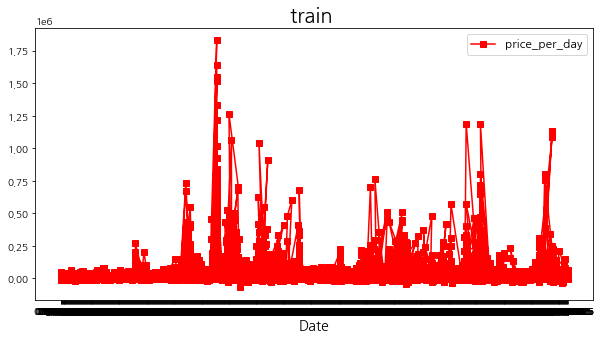

In [45]:
plt.rcParams["figure.figsize"] = (10,5)

plt.plot(train.date, train.price_per_day, marker='s', color='r')
# plt.plot(train.date, train.item_cnt_day, marker='o', color='g')
# plt.plot(train.date, train.Low, marker='*', color='b')
# plt.plot(train.date, train.Open, marker='+', color='y')

plt.title('train ', fontsize=20) 
# plt.ylabel('Stock', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['price_per_day'], fontsize=12, loc='best')

plt.show()

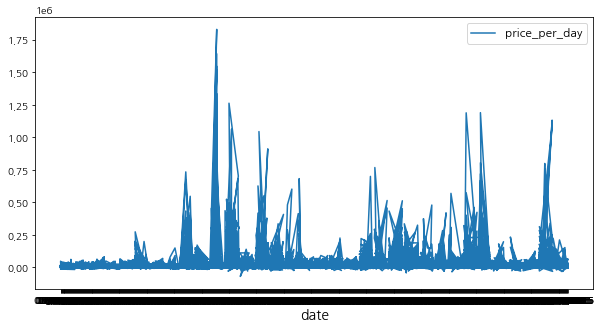

In [46]:
# # 축 그리기 및 좌표축 설정
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# price = train['price_per_day']
# price.plot(ax=ax, style='black')
# # plt.ylim([1600,2200])
# # plt.xlim(['2019-05-01','2020-03-01'])

# # 주석달기
# plt.xlabel('Date', fontsize=14)
# plt.legend(['price_per_day'], fontsize=12, loc='best')

# # 그리드, 타이틀 달기
# plt.grid()
# ax.set_title('price_per_day')

# # 보여주기
# plt.show()



plt.plot(train['date'], train['price_per_day']) # line 그래프를 그립니다

plt.xlabel('date', fontsize=14)
plt.legend(['price_per_day'], fontsize=12, loc='best')

plt.show()

### train + items + shops 데이터 프레임 합치기

In [47]:
train_new = pd.merge(pd.merge(train,items, how='outer',on='item_id'), shops, how='outer', on='shop_id')
train_new

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,price_per_day,item_name,item_category_id,shop_name
0,02.01.2013,0.0,59.0,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир"""
1,16.05.2013,4.0,59.0,2573,249.0,1.0,249.0,DEL REY LANA Born To Die,55,"Ярославль ТЦ ""Альтаир"""
2,26.01.2013,0.0,59.0,2574,399.0,1.0,399.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Ярославль ТЦ ""Альтаир"""
3,09.01.2013,0.0,59.0,2574,399.0,1.0,399.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Ярославль ТЦ ""Альтаир"""
4,24.02.2013,1.0,59.0,2574,399.0,1.0,399.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Ярославль ТЦ ""Альтаир"""
...,...,...,...,...,...,...,...,...,...,...
2936207,NaN,NaN,NaN,21974,NaN,NaN,NaN,"Шарф Doctor Who Tardis синий 1,6м",61,NaN
2936208,NaN,NaN,NaN,21975,NaN,NaN,NaN,Шарф Doctor Who цветной 2м,61,NaN
2936209,NaN,NaN,NaN,22022,NaN,NaN,NaN,ЭКИПАЖ (rem),40,NaN
2936210,NaN,NaN,NaN,22035,NaN,NaN,NaN,ЭЛВИН И БУРУНДУКИ 2,40,NaN


In [48]:
train_new.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'price_per_day', 'item_name', 'item_category_id',
       'shop_name'],
      dtype='object')

## ❓질문❓
### 1. train 데이터 프레임에서 이상치 찾는 법? ('date', 'date_block_num', 'shop_id', 'item_id', 'item_cnt_day')
- date: 최소 최대 확인
- date_block_num: 유니크(0~33)
- shop_id: 유니크 & shops.csv에서 확인
- item_id: 유니크 & items.csv에서 확인
- item_cnt_day: 음수, 실수 X (오직 자연수)  
\-> 일일 판매금액 컬럼 생성 필요: price_per_day: item_price * item_cnt_day
#### 특이치 찾기

### 2. train의 item_id와 test의 item_id 다르다?    
- test의 item_id 중 새롭게 대체가 가능한 품목을 train에서 찾기  

### 3. test의 ID를 train에 넣고 싶은데 합치는 방법
### 4. 불필요 컬럼 선정

# 여기까지 작성. 아래는 연습

### 2) test

In [49]:
print(len(train['shop_id'].unique()))
print(len(test['shop_id'].unique()))
print(len(train['item_id'].unique()))
print(len(test['item_id'].unique()))
print(len(shops['shop_id'].unique()))
print(len(items['item_id'].unique()))

60
42
21807
5100
60
22170


In [50]:
22170 - 21807

363

In [51]:
train[['shop_id', 'item_id']]

,shop_id,item_id
0,59,22154
1,25,2552
2,25,2552
3,25,2554
4,25,2555
...,...,...
2935844,25,7409
2935845,25,7460
2935846,25,7459
2935847,25,7440


In [52]:
shop_item_id = pd.concat([train[['shop_id', 'item_id']], test[['shop_id', 'item_id']]])
print(len(shop_item_id['shop_id'].unique()))
print(len(shop_item_id['item_id'].unique()))

60
22170


In [53]:
train[(train['shop_id'] == 5) & (train['item_id'] == 5037)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,price_per_day
1953995,21.09.2014,20,5,5037,2599.0,1.0,2599.0
2150561,29.11.2014,22,5,5037,2599.0,1.0,2599.0
2288630,28.12.2014,23,5,5037,1999.0,1.0,1999.0
2288631,20.12.2014,23,5,5037,1999.0,1.0,1999.0
2335446,02.01.2015,24,5,5037,1999.0,1.0,1999.0
2335447,07.01.2015,24,5,5037,1999.0,1.0,1999.0
2618926,29.05.2015,28,5,5037,1299.0,1.0,1299.0
2704068,28.06.2015,29,5,5037,1499.0,1.0,1499.0
2719247,05.07.2015,30,5,5037,1499.0,1.0,1499.0
2810661,14.08.2015,31,5,5037,1499.0,1.0,1499.0


In [54]:
# array 정렬
train_shop_id = np.sort(train['shop_id'].unique())
print(train_shop_id)
print(len(train_shop_id))
test_shop_id = np.sort(test['shop_id'].unique())
print(test_shop_id)
print(len(test_shop_id))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
60
[ 2  3  4  5  6  7 10 12 14 15 16 18 19 21 22 24 25 26 28 31 34 35 36 37
 38 39 41 42 44 45 46 47 48 49 50 52 53 55 56 57 58 59]
42


# 이상치 처리

1. item_price
- 너무 높은 값 삭제

2. item_cnt_day
 1) 너무 높은 값(2169) 삭제
 2) 환불 데이터과 구매 데이터 삭제 